In [ ]:
# Fix randomness and hide warnings
seed = 42

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["PYTHONHASHSEED"] = str(seed)
os.environ["MPLCONFIGDIR"] = os.getcwd() + "/configs/"

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)

import numpy as np

np.random.seed(seed)

import logging

import random

random.seed(seed)

In [ ]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.13.0


In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

plt.rc("font", size=16)

In [ ]:
gen_data_A = np.load("/kaggle/input/generated-a/generated_samples_A_normalized.npy")
gen_data_F = np.load("/kaggle/input/generated-f/generated_samples_F_normalized.npy")
data = np.load("/kaggle/input/real-data/training_data.npy")
categories = np.load("/kaggle/input/categories/categories.npy")

In [ ]:
print(gen_data_F.shape)
print(data.shape)
print(categories.shape)

(2000, 2776)
(48000, 2776)
(48000,)


In [ ]:
# Get the unique categories
unique_categories = np.unique(categories)
data_A=[]
data_B=[]
data_C=[]
data_D=[]
data_E=[]
data_F=[]

for cat in unique_categories:
  for i in range(categories.shape[0]):
    if categories[i]==cat:
      if cat=='A':
        data_A.append(data[i, :])
      elif cat=='B':
        data_B.append(data[i, :])
      elif cat=='C':
        data_C.append(data[i, :])
      elif cat=='D':
        data_D.append(data[i, :])
      elif cat=='E':
        data_E.append(data[i, :])
      elif cat=='F':
        data_F.append(data[i, :])

print(f"There are {len(data_A)} elements in the dataset of category A")
print(f"There are {len(data_B)} elements in the dataset of category B")
print(f"There are {len(data_C)} elements in the dataset of category C")
print(f"There are {len(data_D)} elements in the dataset of category D")
print(f"There are {len(data_E)} elements in the dataset of category E")
print(f"There are {len(data_F)} elements in the dataset of category F")

There are 5728 elements in the dataset of category A
There are 10987 elements in the dataset of category B
There are 10017 elements in the dataset of category C
There are 10016 elements in the dataset of category D
There are 10975 elements in the dataset of category E
There are 277 elements in the dataset of category F


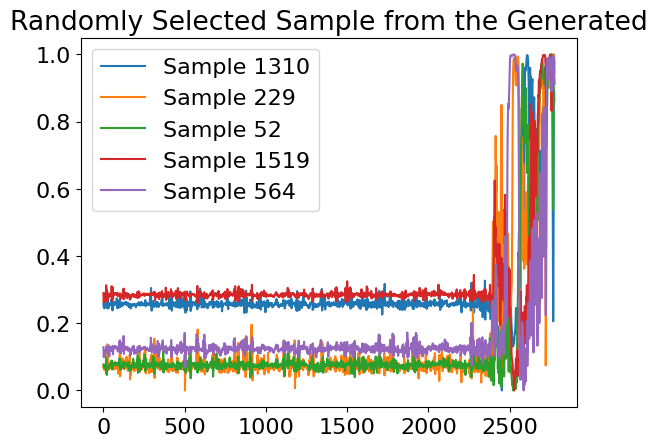

In [ ]:
# Number of samples to plot
num_samples_to_plot = 5

# Generate 5 random indices
random_indices = random.sample(range(gen_data_F.shape[0]), num_samples_to_plot)

# Plot the selected samples
for i in random_indices:
    plt.plot(gen_data_F[i, :], label=f'Sample {i + 1}')

plt.title('Randomly Selected Sample from the Generated')
plt.legend()
plt.show()

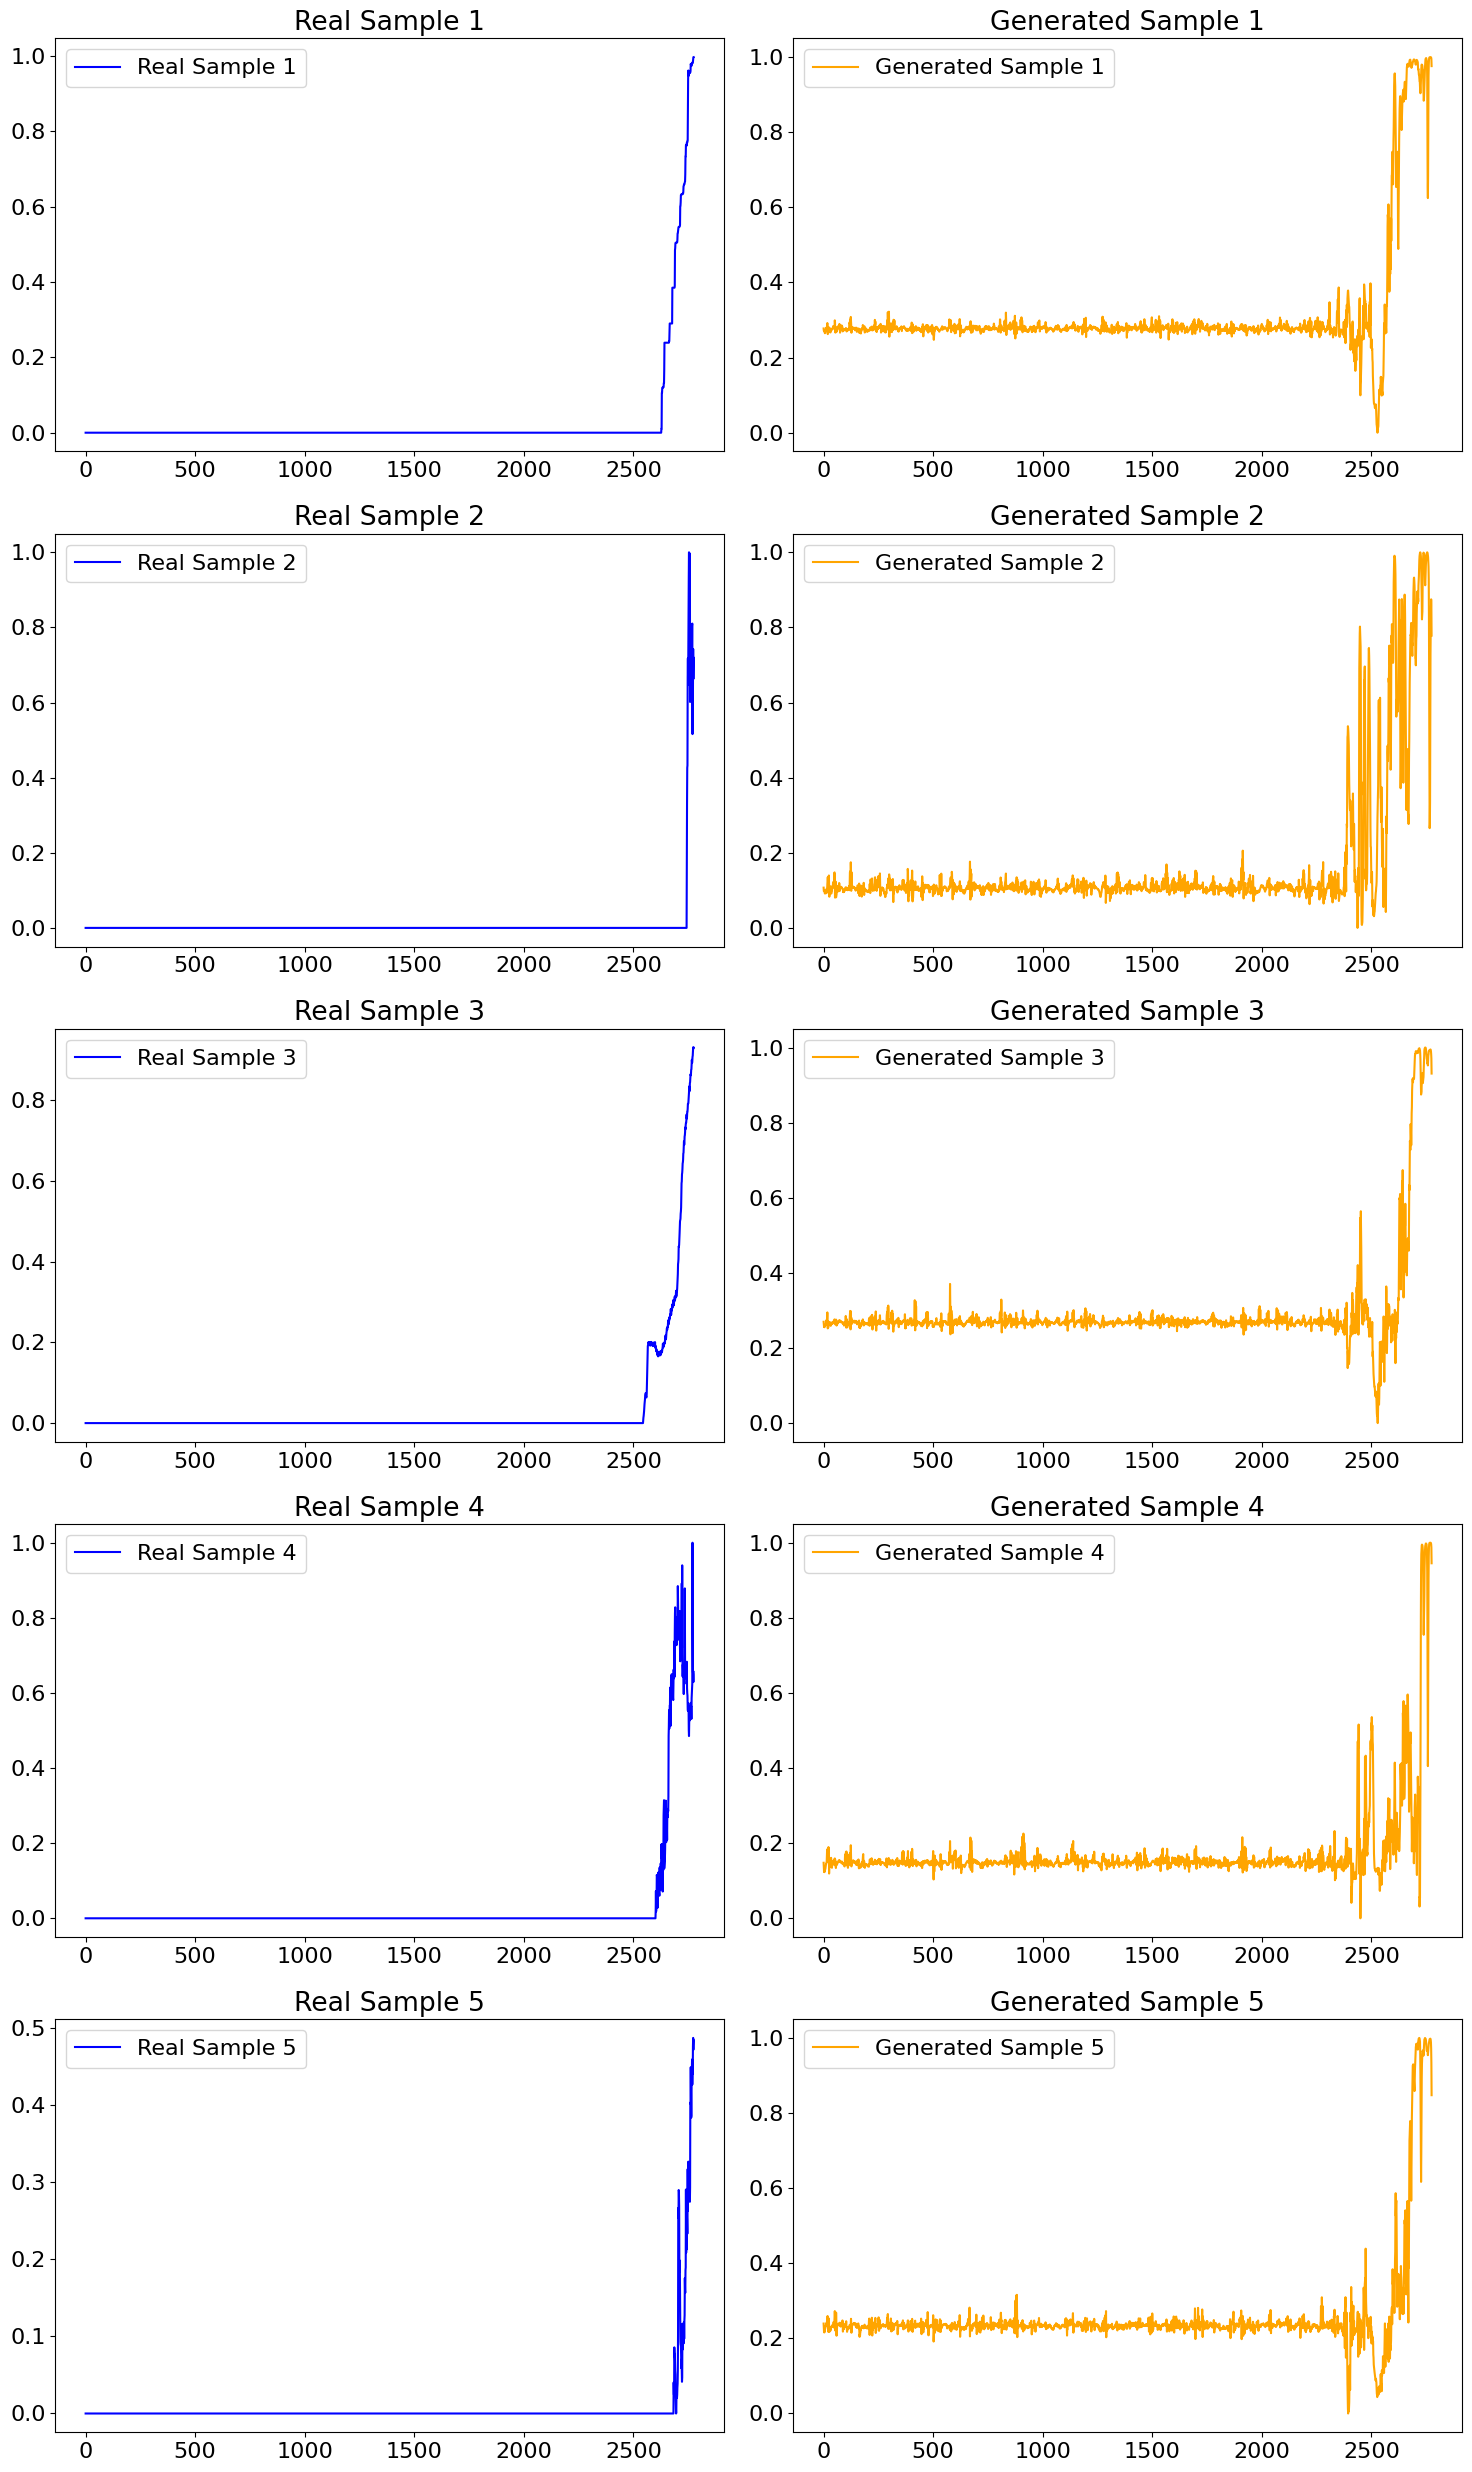

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_real_vs_generated_samples(data_real, data_generated):
    # Get the minimum length between data_real and data_generated
    min_length = min(data_real.shape[1], data_generated.shape[1])

    # Ensure that the number of samples is within the valid range
    num_samples = min(5, min(data_real.shape[0], data_generated.shape[0]))

    # Get random indices for samples
    random_indices_real = np.random.choice(data_real.shape[0], num_samples, replace=False)
    random_indices_generated = np.random.choice(data_generated.shape[0], num_samples, replace=False)

    # Plot side by side
    plt.figure(figsize=(15, 5 * num_samples))

    for i in range(num_samples):
        # Plot real data
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.plot(data_real[random_indices_real[i], :min_length], label=f'Real Sample {i + 1}', color='blue')
        plt.title(f'Real Sample {i + 1}')
        plt.legend()

        # Plot generated data
        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.plot(data_generated[random_indices_generated[i], :min_length], label=f'Generated Sample {i + 1}', color='orange')
        plt.title(f'Generated Sample {i + 1}')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming you have data_A and gen_data_A
data_F = np.array(data_F)

# Call the function to plot samples
plot_real_vs_generated_samples(data_F, gen_data_F)



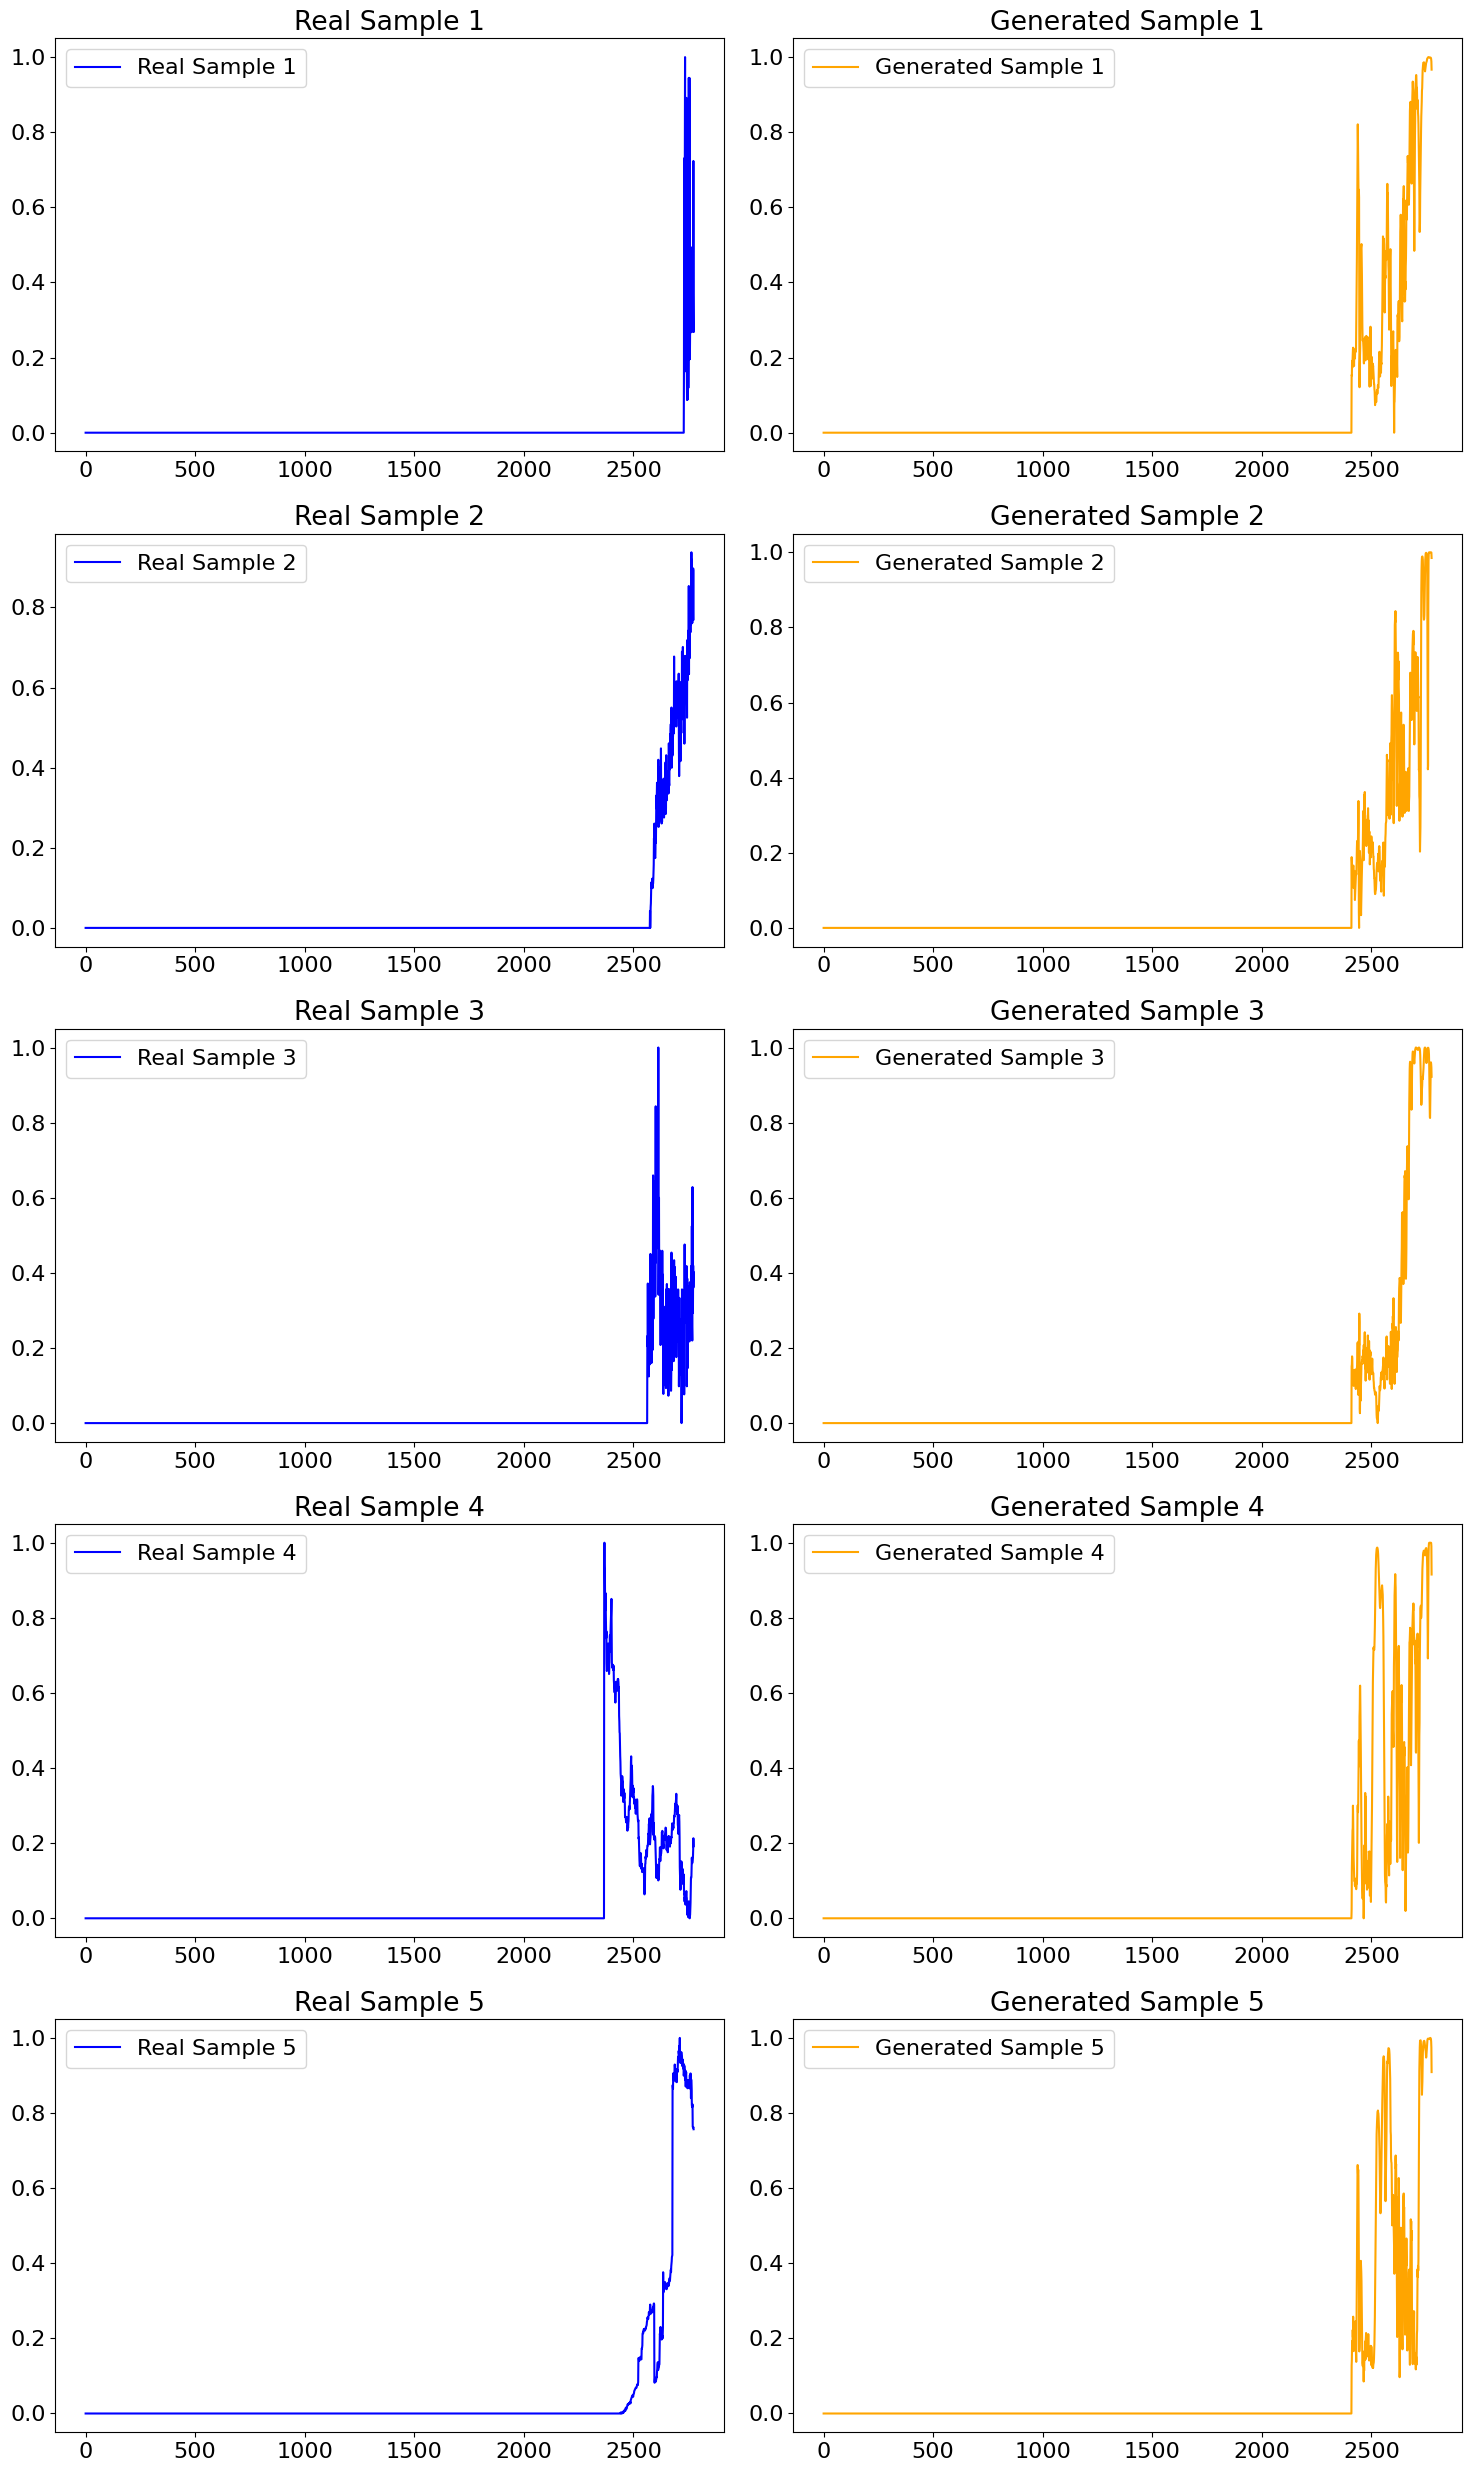

In [ ]:
# Assign the values of the original data to the zero array starting from index 2500
zero_data_F = gen_data_F
# Assuming gen_data_A is your generated data array
random_index = np.random.randint(2400, 2500)

# Now you can use this random index to access the corresponding column
zero_data_F[:, :random_index] = 0

plot_real_vs_generated_samples(data_F, zero_data_F)

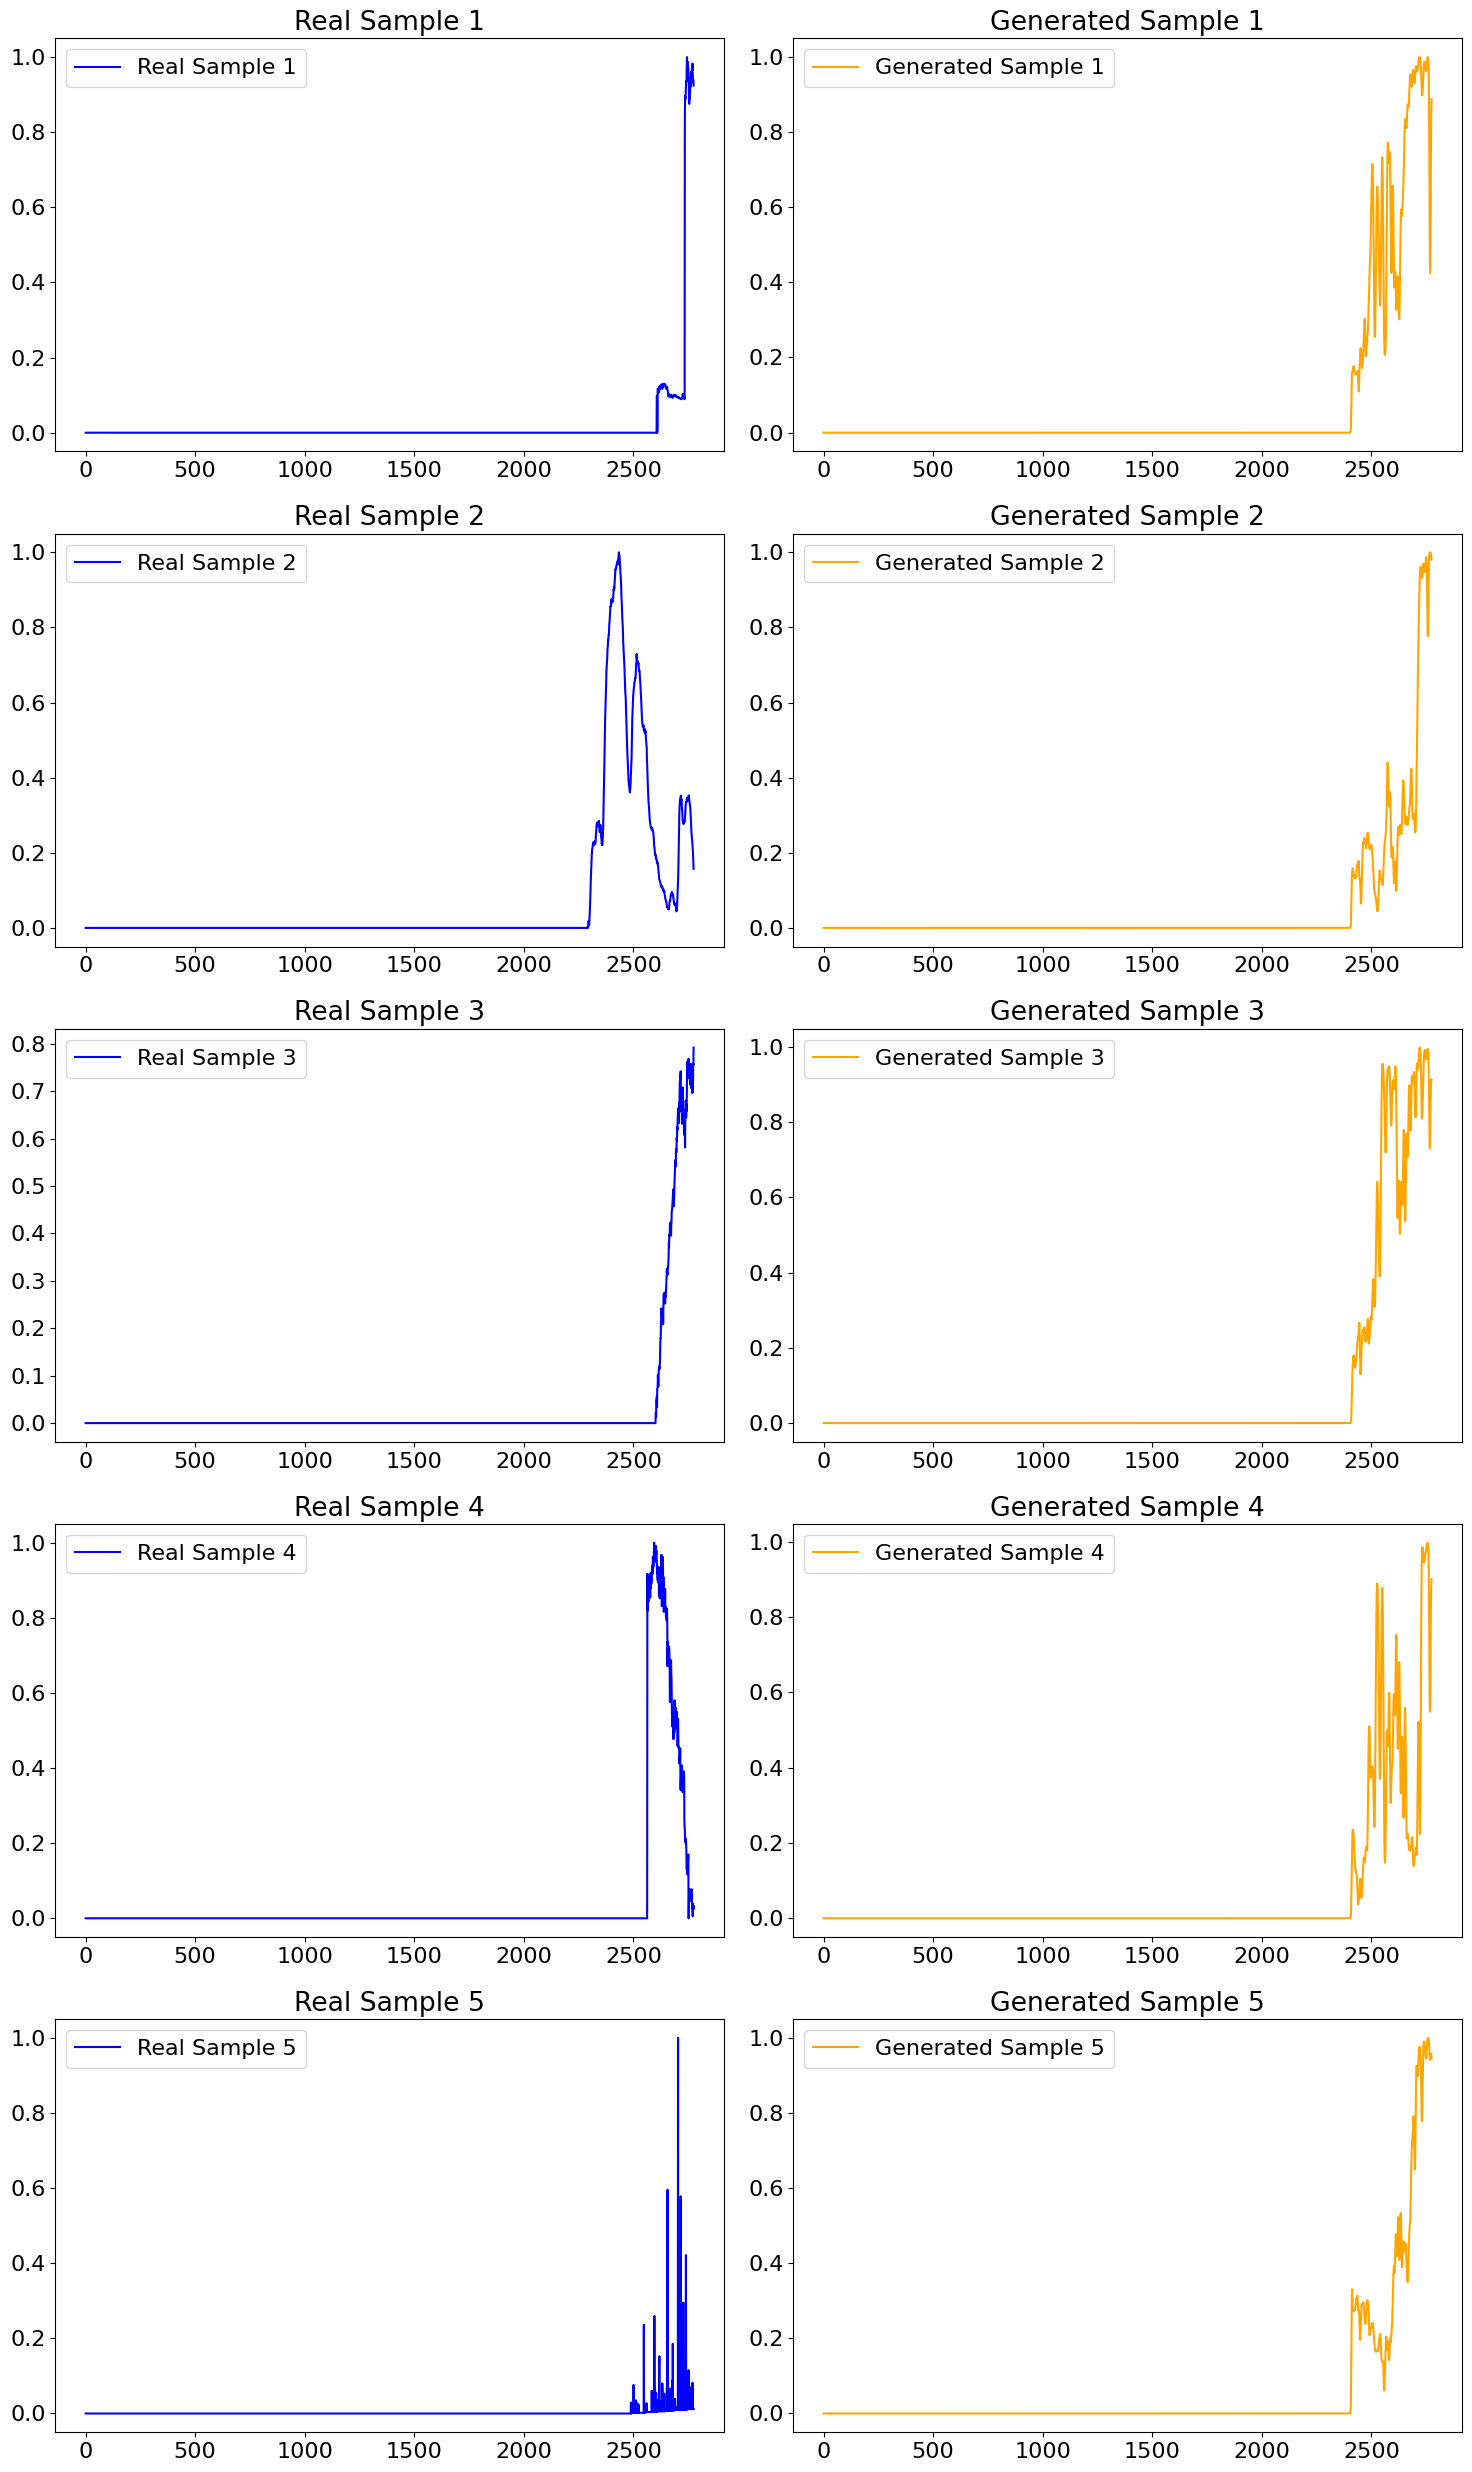

In [ ]:
from scipy.ndimage import gaussian_filter1d


# Apply a Gaussian smoothing function with a sigma of 2

smoothed_data_F = gaussian_filter1d(zero_data_F, sigma=2)

plot_real_vs_generated_samples(data_F, smoothed_data_F)

In [ ]:
np.save('/kaggle/working/generated_samples_F_adjusted', smoothed_data_F[:200])